Objective : To check application of zif's law on classic Tamil language text consisting **Thirukural** which of 1,330 short couplets, seven words each. 3 units /adikarams

Zipf's law states that the frequency of any word in a text is inversely proportional to its rank in the frequency table. In simpler terms, it means that the most common word appears approximately twice as often as the second most common word, three times as often as the third most common word, and so on. This relationship follows a power-law distribution.


In [39]:
import collections

In [40]:
def _remove_punctuation(text):
    chars_to_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"
    tr = str.maketrans("", "", chars_to_remove)
    return text.translate(tr)

In [41]:
def _top_word_frequencies(text):
  #outputs list of tuples which has words and thier frequency
    words = text.split() # splits sentences with whitespace chracter
    global word_frequencies
    word_frequencies = collections.Counter(words)#counts word frequency

# most_common() returns a list of top 'n' elements from most common to least common, as specified the parameter 'n'.
    top_word_frequencies = word_frequencies.most_common()

    return top_word_frequencies

In [42]:
def _create_zipf_table(frequencies):
    zipf_table = []
    top_frequency = frequencies[0][1]
    for index, item in enumerate(frequencies, start=1):

        relative_frequency = "1/{}".format(index)
        zipf_frequency = top_frequency * (1 / index)
        difference_actual = item[1] - zipf_frequency
        difference_percent = (item[1] / zipf_frequency) * 100

        zipf_table.append({"word": item[0],
                           "actual_frequency": item[1],
                           "relative_frequency": relative_frequency,
                           "zipf_frequency": zipf_frequency,
                           "difference_actual": difference_actual,
                           "difference_percent": difference_percent})

    return zipf_table

In [43]:
def print_zipf_table(zipf_table):
    width = 80
    print("-" * width)
    print("|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|")
    print("-" * width)

    format_string = "|{:4}|{:12}|{:12.0f}|{:>12}|{:12.2f}|{:12.2f}|{:7.2f}%|"

    for index, item in enumerate(zipf_table, start=1):

        print(format_string.format(index,
                                   item["word"],
                                   item["actual_frequency"],
                                   item["relative_frequency"],
                                   item["zipf_frequency"],
                                   item["difference_actual"],
                                   item["difference_percent"]))

    print("-" * width)

In [44]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset/Thirukural.csv')
df

,Chapter Name,Section Name,Verse,Translation
0,அறத்துப்பால்,கடவுள் வாழ்த்து,அகர\tமுதல\tஎழுத்தெல்லாம்\tஆதி\t\t\tபகவன்\tமுதற...,"A, as its first of letters, every speech maint..."
1,அறத்துப்பால்,கடவுள் வாழ்த்து,கற்றதனால்\tஆய\tபயனென்கொல்\tவாலறிவன்\t\t\tநற்றா...,"No fruit have men of all their studied lore, S..."
2,அறத்துப்பால்,கடவுள் வாழ்த்து,மலர்மிசை\tஏகினான்\tமாணடி\tசேர்ந்தார்\t\t\tநிலம...,"His feet, 'Who o'er the full-blown flower hath..."
3,அறத்துப்பால்,கடவுள் வாழ்த்து,வேண்டுதல்\tவேண்டாமை\tஇலானடி\tசேர்ந்தார்க்கு\t\...,"His foot, 'Whom want affects not, irks not gri..."
4,அறத்துப்பால்,கடவுள் வாழ்த்து,இருள்சேர்\tஇருவினையும்\tசேரா\tஇறைவன்\t\t\tபொரு...,"The men, who on the 'King's' true praised deli..."
...,...,...,...,...
1325,காமத்துப்பால்,ஊடலுவகை,உணலினும்\tஉண்டது\tஅறல்இனிது\tகாமம்\t\t\tபுணர்த...,'Tis sweeter to digest your food than 'tis to ...
1326,காமத்துப்பால்,ஊடலுவகை,ஊடலில்\tதோற்றவர்\tவென்றார்\tஅதுமன்னும்\t\t\tகூ...,"In lovers' quarrels, 'tis the one that first g..."
1327,காமத்துப்பால்,ஊடலுவகை,ஊடிப்\tபெறுகுவம்\tகொல்லோ\tநுதல்வெயர்ப்பக்\t\t\...,And shall we ever more the sweetness know of t...
1328,காமத்துப்பால்,ஊடலுவகை,ஊடுக\tமன்னோ\tஒளியிழை\tயாமிரப்ப\t\t\tநீடுக\tமன்...,"Let her, whose jewels brightly shine, aversion..."


In [45]:
df['Verse'].to_csv('/content/thirukural.txt', sep="\n", index=False)

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|படும்       |          42|         1/1|       42.00|        0.00| 100.00%|
|   2|தரும்       |          37|         1/2|       21.00|       16.00| 176.19%|
|   3|இல்         |          32|         1/3|       14.00|       18.00| 228.57%|
|   4|கெடும்      |          28|         1/4|       10.50|       17.50| 266.67%|
|   5|இல்லை       |          22|         1/5|        8.40|       13.60| 261.90%|
|   6|செயல்       |          22|         1/6|        7.00|       15.00| 314.29%|
|   7|என்னும்     |          22|         1/7|        6.00|       16.00| 366.67%|
|   8|தலை         |          21|         1/8|        5.25|       15.75| 400.00%|
|   9|எல்லாம்     |          21|         1/9|        4.67|       16.33| 450.00%|
|  10|கொளல்       |         

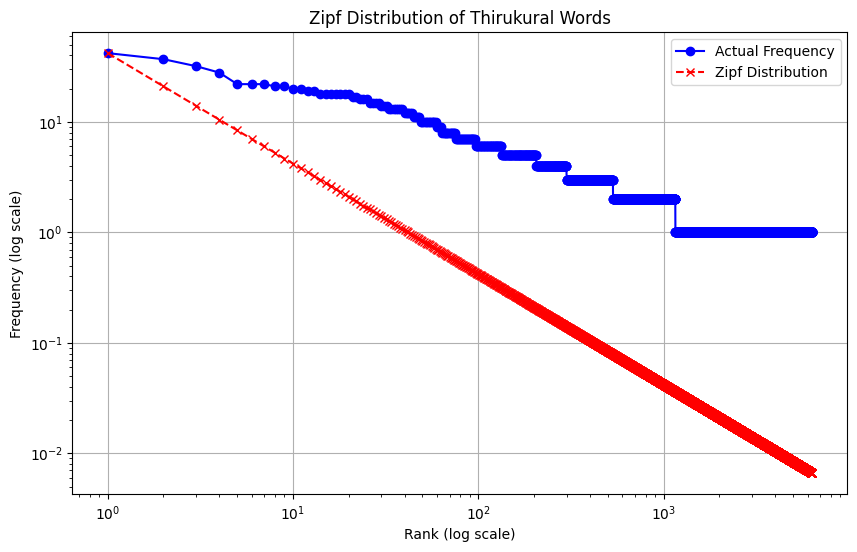

In [52]:
def main():
    try:

        f = open("/content/thirukural.txt", "r")
        text = f.read()
        f.close()

        text = _remove_punctuation(text)

        text = text.lower()

        top_word_frequencies = _top_word_frequencies(text)

        zipf_table = _create_zipf_table(top_word_frequencies)

        print_zipf_table(zipf_table[0:30])

                # Plot and save the Zipf distribution plot
        plot_zipf_distribution(zipf_table)

        # Save the Zipf table as a CSV file
        save_zipf_table(zipf_table, 'zipf_table.csv')

    except IOError as e:

        print(e)


main()

The graph shows the frequency of each word in Thirukural as a function of its rank on a log-log scale. The x-axis is the rank of the word (log scale) and the y-axis is the actual frequency of the word (log scale). The graph is a blue line with square markers. The line has a steep slope at the beginning and then flattens out towards the end. This indicates that there are a few words that occur very frequently in Thirukural, while most words occur rarely or only once. The title of the graph is “Zipf Distribution of Thirukural Words”.


In [47]:
import matplotlib.pyplot as plt

In [51]:
def plot_zipf_distribution(zipf_table):
    ranks = list(range(1, len(zipf_table) + 1))
    actual_frequencies = [item["actual_frequency"] for item in zipf_table]
    zipf_distribution= [item["zipf_frequency"] for item in zipf_table]
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, actual_frequencies, marker='o', linestyle='-', color='b', label='Actual Frequency')
    plt.loglog(ranks, zipf_distribution, marker='x', linestyle='--', color='r', label='Zipf Distribution')
    plt.xlabel('Rank (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.title('Zipf Distribution of Thirukural Words')
    plt.grid(True)
    plt.legend()
    plt.savefig('zipf_distribution.png')
    plt.show()




def save_zipf_table(zipf_table, file_path):
    df = pd.DataFrame(zipf_table)
    df.to_csv(file_path, index=False)

In [49]:
for_printing=word_frequencies.most_common(60)
print(for_printing)

[('படும்', 42), ('தரும்', 37), ('இல்', 32), ('கெடும்', 28), ('இல்லை', 22), ('செயல்', 22), ('என்னும்', 22), ('தலை', 21), ('எல்லாம்', 21), ('கொளல்', 20), ('காமம்', 20), ('பெறின்', 19), ('பவர்', 19), ('உலகு', 18), ('அரிது', 18), ('இன்பம்', 18), ('தவர்', 18), ('விடல்', 18), ('யவர்', 18), ('கண்ணும்', 18), ('விடும்', 17), ('கண்', 17), ('கடை', 16), ('தற்று', 16), ('செயின்', 16), ('வேண்டும்', 15), ('எஞ்ஞான்றும்', 15), ('நன்று', 15), ('நட்பு', 15), ('வார்', 14), ('உடைத்து', 14), ('இன்மை', 14), ('தார்', 13), ('பெருமை', 13), ('ஆற்றின்', 13), ('வரும்', 13), ('இன்னா', 13), ('மன்னவன்', 13), ('வேந்தன்', 13), ('ஆக்கம்', 12), ('பிற', 12), ('துணை', 12), ('கேண்மை', 12), ('நெஞ்சு', 12), ('இனிது', 11), ('என்பது', 11), ('செல்வம்', 11), ('என்று', 11), ('இடும்பை', 10), ('வாழ்க்கை', 10), ('செய்யும்', 10), ('சொல்', 10), ('கொல்லோ', 10), ('பேதைமை', 10), ('யாதெனின்', 10), ('வினை', 10), ('துன்பம்', 10), ('காணின்', 10), ('பேதை', 10), ('உலகம்', 9)]


 “தரும்” has a frequency of 37, while the Zipf’s law predicts that it should have a frequency of 21, based on its rank of 2. This means that the word “தரும்” is more frequent than expected by the law, and it has a deviation of 16 and a percentage of 176.19%. However, this does not mean that the Zipf’s law is invalid or inaccurate. It just means that the word “தரும்” is an outlier or an exception to the general pattern. There could be many reasons for this, such as the meaning, usage, or importance of the word in Thirukural.

If you look at the graph of the Zipf distribution of Thirukural words, you will see that most of the points lie close to the blue line, which represents the Zipf’s law. This means that most of the words have frequencies that are close to the expected values by the law. However, there are also some points that are far away from the line, which means that they have frequencies that are much higher or lower than expected. These are the outliers or exceptions that do not follow the Zipf’s law perfectly.

The Zipf’s law is not a deterministic or exact formula that can predict every word frequency precisely. It is a probabilistic or approximate model that can capture the overall distribution and behavior of word frequencies in natural language texts. It is based on empirical data and statistical analysis, and it has some limitations and assumptions. Therefore, it is normal and expected to have some variations and deviations from the Zipf’s law in any text, especially when dealing with small sample sizes or specific genres or domains.

Citations

https://www.codedrome.com/zipfs-law-in-python/


https://en.wikipedia.org/wiki/Zipf%27s_law

https://iq.opengenus.org/zipfs-law/


Data

https://www.kaggle.com/datasets/rahulvks/thirukkural?resource=download


